In [ ]:
%pip install seaborn

In [45]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import matplotlib.dates as mdates


In [75]:
# Load last 200 records from MetaTrader
def load_data(symbol, timeframe, n=200):
    if not mt5.initialize():
        print("MetaTrader5 initialization failed")
        mt5.shutdown()
        return None
    rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, n)
    mt5.shutdown()
    if rates is None:
        print("Failed to retrieve data")
        return None
    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

In [76]:
# Calculate Relative Strength Index (RSI)
def calculate_rsi(df, period=14):
    df['RSI'] = ta.momentum.RSIIndicator(df['close'], window=period).rsi()
    return df

In [77]:
# Calculate MACD
def calculate_macd(df):
    macd = ta.trend.MACD(df['close'])
    df['MACD'] = macd.macd()
    df['Signal'] = macd.macd_signal()
    df['Hist'] = macd.macd_diff()
    return df

In [87]:
def plot_chart(df):
    ap = [
        mpf.make_addplot(df['RSI'], panel=1, color='purple', ylabel='RSI', width=0.5),
        mpf.make_addplot(df['MACD'], panel=2, color='blue', ylabel='MACD', width=0.5),
        mpf.make_addplot(df['Signal'], panel=2, color='red', width=0.5),
        mpf.make_addplot(df['Hist'], panel=2, type='bar', color='gray', alpha=0.7)
    ]
    # Plot with mplfinance
    fig, _ = mpf.plot(
        df, type='candle', style='yahoo', ema=(9,21), datetime_format='%H:%M',
        addplot=ap, volume=False, panel_ratios=(6, 2, 2), figratio=(300, 150),
        tight_layout=True, returnfig=True, xrotation=0
    )
    # Adjust the bottom border of each subplot for clear separation
    for ax in fig.axes:
        ax.spines['bottom'].set_color('black')  # Set bottom border color to black
        ax.spines['bottom'].set_linewidth(2)    # Make the bottom border thicker

        # Increase the number of x-ticks (more intervals)
        num_ticks = 20  # Adjust this value to increase or decrease intervals
        xticks = np.linspace(0, len(df) - 1, num_ticks).astype(int)
        ax.set_xticks(xticks)
        ax.set_xticklabels(df.index[xticks].strftime('%H:%M'))
    plt.show()


In [88]:
def main(symbol):
    df = load_data(symbol=symbol, timeframe=mt5.TIMEFRAME_M15)
    if df is not None:
        df = calculate_rsi(df)
        df = calculate_macd(df)
        plot_chart(df)

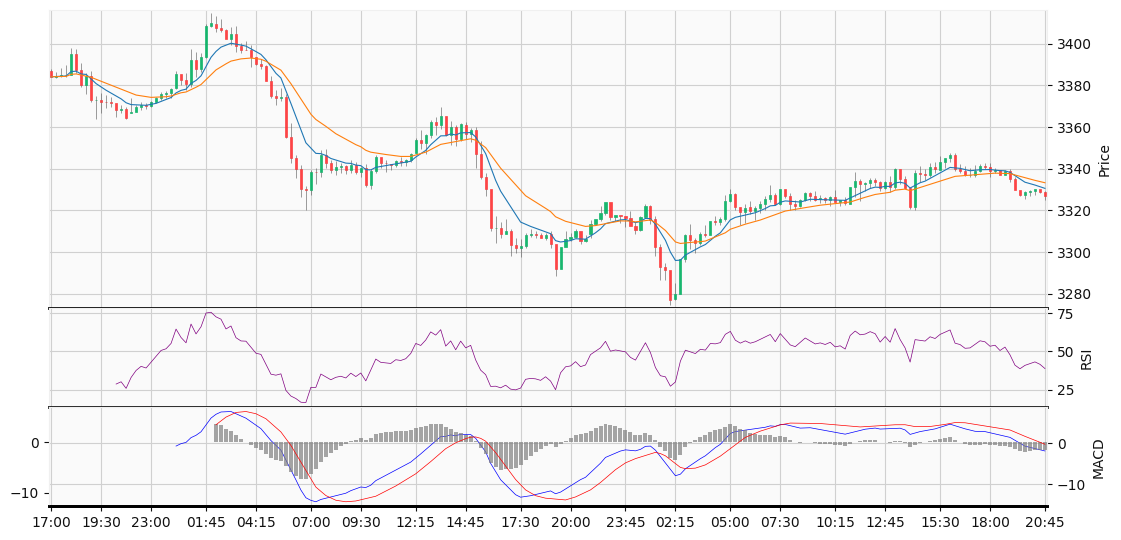

In [89]:
main(symbol='XAUUSD')